In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv("/content/drive/MyDrive/Diabetes Prediction Using Machine Learning2/ diabetes.csv")
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [25]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [26]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [27]:
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Zero মানকে NaN এ রূপান্তর
for col in cols_with_missing:
    df[col] = df[col].replace(0, np.nan)

# Median দিয়ে পূরণ
for col in cols_with_missing:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

/tmp/ipython-input-707500479.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [28]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [29]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [30]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Features এবং Target আলাদা করা
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# সব feature কে positive value তে আনার জন্য scaling (chi2 এর জন্য দরকার)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chi-Square Test ব্যবহার করে top 5 feature বের করা
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_scaled, y)

# কোন কোন feature সিলেক্ট হয়েছে
selected_features = X.columns[selector.get_support()]
print("Selected Features (Top 5):")
print(selected_features)

# প্রতিটি feature এর score দেখানো
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

print("\nFeature Importance Table:")
print(feature_scores)
'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'
'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'

Selected Features (Top 5):
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

Feature Importance Table:
                    Feature  Chi2 Score
1                   Glucose   14.336331
7                       Age    8.205691
0               Pregnancies    6.559982
5                       BMI    5.064034
6  DiabetesPedigreeFunction    2.758584
4                   Insulin    2.255362
3             SkinThickness    1.345611
2             BloodPressure    0.650037


('Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Features এবং Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=5)   # Top 5 feature
fit = rfe.fit(X, y)

# কোন কোন feature নির্বাচিত হলো
selected_features = X.columns[fit.support_]
print("Selected Features (Wrapper - RFE):")
print(selected_features)

# সব feature এর ranking দেখা
feature_ranking = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": fit.ranking_
}).sort_values(by="Ranking")

print("\nFeature Ranking Table:")
print(feature_ranking)
#'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'
'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'

Selected Features (Wrapper - RFE):
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

Feature Ranking Table:
                    Feature  Ranking
0               Pregnancies        1
1                   Glucose        1
6  DiabetesPedigreeFunction        1
5                       BMI        1
7                       Age        1
2             BloodPressure        2
3             SkinThickness        3
4                   Insulin        4


('Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [32]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Load dataset
#df = pd.read_csv("your_dataset.csv")

# Split features & target
X = df.drop("Outcome", axis=1)   # replace "target" with your target column name
y = df["Outcome"]

# Scale data (Chi2 requires non-negative features)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---- 1. Chi-Square Test ----
chi_selector = SelectKBest(score_func=chi2, k="all")
chi_selector.fit(X_scaled, y)

chi_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

print("Chi-Square Feature Ranking:\n", chi_scores)

# ---- 2. Mutual Information ----
mi_selector = SelectKBest(score_func=mutual_info_classif, k="all")
mi_selector.fit(X_scaled, y)

mi_scores = pd.DataFrame({
    "Feature": X.columns,
    "MI Score": mi_selector.scores_
}).sort_values(by="MI Score", ascending=False)

print("\nMutual Information Feature Ranking:\n", mi_scores)


Chi-Square Feature Ranking:
                     Feature  Chi2 Score
1                   Glucose   14.336331
7                       Age    8.205691
0               Pregnancies    6.559982
5                       BMI    5.064034
6  DiabetesPedigreeFunction    2.758584
4                   Insulin    2.255362
3             SkinThickness    1.345611
2             BloodPressure    0.650037

Mutual Information Feature Ranking:
                     Feature  MI Score
1                   Glucose  0.132442
5                       BMI  0.083394
7                       Age  0.062501
0               Pregnancies  0.033147
4                   Insulin  0.030118
6  DiabetesPedigreeFunction  0.021364
3             SkinThickness  0.000000
2             BloodPressure  0.000000


In [33]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Load dataset
# df = pd.read_csv("your_dataset.csv")

# Split features & target
X = df.drop("Outcome", axis=1)   # replace "Outcome" with your target column name
y = df["Outcome"]

# Scale data (Chi2 requires non-negative features)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---- 1. Chi-Square Test ----
chi_selector = SelectKBest(score_func=chi2, k="all")
chi_selector.fit(X_scaled, y)

chi_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

print("Top 5 Features by Chi-Square:\n", chi_scores.head(5))

# ---- 2. Mutual Information ----
mi_selector = SelectKBest(score_func=mutual_info_classif, k="all")
mi_selector.fit(X_scaled, y)

mi_scores = pd.DataFrame({
    "Feature": X.columns,
    "MI Score": mi_selector.scores_
}).sort_values(by="MI Score", ascending=False)

print("\nTop 5 Features by Mutual Information:\n", mi_scores.head(5))
'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'

Top 5 Features by Chi-Square:
                     Feature  Chi2 Score
1                   Glucose   14.336331
7                       Age    8.205691
0               Pregnancies    6.559982
5                       BMI    5.064034
6  DiabetesPedigreeFunction    2.758584

Top 5 Features by Mutual Information:
        Feature  MI Score
1      Glucose  0.125912
5          BMI  0.089372
7          Age  0.045364
0  Pregnancies  0.035927
4      Insulin  0.028072


('Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [34]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# ------------------------------
# Load dataset
# df = pd.read_csv("your_dataset.csv")   # এখানে dataset load করবেন
# ------------------------------

# Split features & target
X = df.drop("Outcome", axis=1)   # আপনার target column name "Outcome"
y = df["Outcome"]

# Scale data (Chi2 requires non-negative features)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---- 1. Chi-Square Test ----
chi_selector = SelectKBest(score_func=chi2, k="all")
chi_selector.fit(X_scaled, y)

chi_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

# Top 5 Chi-Square Features (list আকারে)
top5_chi = chi_scores.head(5)["Feature"].tolist()
print("Top 5 Chi-Square Features:", top5_chi)

# ---- 2. Mutual Information ----
mi_selector = SelectKBest(score_func=mutual_info_classif, k="all")
mi_selector.fit(X_scaled, y)

mi_scores = pd.DataFrame({
    "Feature": X.columns,
    "MI Score": mi_selector.scores_
}).sort_values(by="MI Score", ascending=False)

# Top 5 Mutual Information Features (list আকারে)
top5_mi = mi_scores.head(5)["Feature"].tolist()
print("Top 5 Mutual Information Features:", top5_mi)
#'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'
'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'


Top 5 Chi-Square Features: ['Glucose', 'Age', 'Pregnancies', 'BMI', 'DiabetesPedigreeFunction']
Top 5 Mutual Information Features: ['Glucose', 'BMI', 'Age', 'Insulin', 'SkinThickness']


('Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [35]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# ------------------------------
# Load dataset
# df = pd.read_csv("your_dataset.csv")
# ------------------------------

# Split features & target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Logistic Regression model (base estimator)
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Recursive Feature Elimination (select top 5 features)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_].tolist()
print("Top 5 Features by Wrapper Method (RFE):", selected_features)
'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'

Top 5 Features by Wrapper Method (RFE): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']


('Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [36]:
import pandas as pd
from scipy.stats import pointbiserialr

# ধরুন df তে Outcome (0/1) আর বাকি সব numeric feature আছে
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

correlation_scores = {}
for col in X.columns:
    corr, _ = pointbiserialr(X[col], y)
    correlation_scores[col] = corr

# DataFrame বানানো
corr_df = pd.DataFrame.from_dict(correlation_scores, orient='index', columns=['Correlation'])
corr_df = corr_df.reindex(corr_df['Correlation'].abs().sort_values(ascending=False).index)

print("Feature ranking by Correlation:\n", corr_df)
print("\nTop 5 Features by Correlation:", corr_df.head(5).index.tolist())


Feature ranking by Correlation:
                           Correlation
Glucose                      0.492782
BMI                          0.312038
Age                          0.238356
Pregnancies                  0.221898
SkinThickness                0.214873
Insulin                      0.203790
DiabetesPedigreeFunction     0.173844
BloodPressure                0.165723

Top 5 Features by Correlation: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']


In [37]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

mi = mutual_info_classif(X_scaled, y)
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print("Top 5 Features by Mutual Information:", mi_df.head(5)["Feature"].tolist())
#'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'

Top 5 Features by Mutual Information: ['Glucose', 'BMI', 'Insulin', 'Pregnancies', 'Age']


In [38]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features to handle varying ranges (MinMaxScaler is often used with chi2)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with chi2 to select the top 4 features
best_features = SelectKBest(score_func=chi2, k=4)
fit = best_features.fit(X_scaled, y)

# Create a DataFrame to display feature scores
feature_scores = pd.DataFrame({'Features': X.columns, 'Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)

# Output would show Glucose, BMI, Age, and DPF with the highest scores
# [ 1.3.8 ]
#'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'
#'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'
'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'
'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'
'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'
'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'
'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'

                   Features      Score
1                   Glucose  14.336331
7                       Age   8.205691
0               Pregnancies   6.559982
5                       BMI   5.064034
6  DiabetesPedigreeFunction   2.758584
4                   Insulin   2.255362
3             SkinThickness   1.345611
2             BloodPressure   0.650037


('Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [39]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define the model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# RFE to select top 4 features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_].tolist()
print("Top 4 Features by Wrapper Method (RFE):", selected_features)
'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'
'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'

Top 4 Features by Wrapper Method (RFE): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']


('Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age')

In [40]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Define model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# RFE to select top 5 features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]

# Get feature importance from the underlying model coefficients
# Only for the selected features
scores = np.abs(rfe.estimator_.coef_[0])
feature_scores = pd.DataFrame({
    'Features': selected_features,
    'Score': scores
}).sort_values(by='Score', ascending=False)

print(feature_scores)
print("Top 4 Features by Wrapper Method (RFE):", selected_features)
'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'

                   Features     Score
4  DiabetesPedigreeFunction  0.615984
0               Pregnancies  0.133458
3                       BMI  0.063887
1                   Glucose  0.031023
2             BloodPressure  0.021791
Top 4 Features by Wrapper Method (RFE): Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')


('Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age')

 Best Features : ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
 Best Parameters: {'C': 10, 'solver': 'liblinear'}
 Accuracy: 0.7727272727272727

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



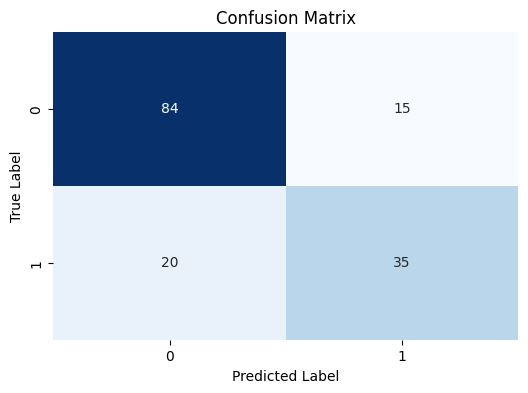

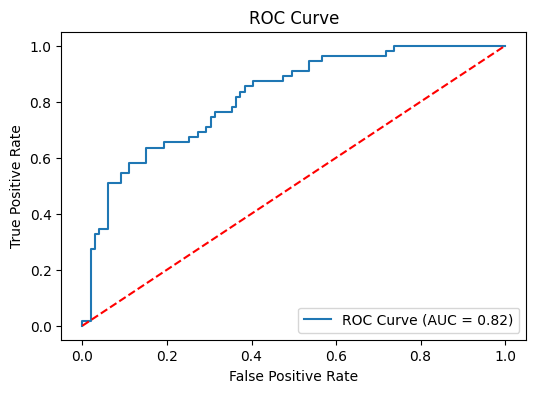

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)


X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Selection = Filter Method
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(" Best Features :", selected_features.tolist())


# Hyperparameter Tuning → Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Model performance
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


 Best Features : ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
 Best Parameters: {'C': 10, 'solver': 'liblinear'}
 Accuracy: 0.7727272727272727

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



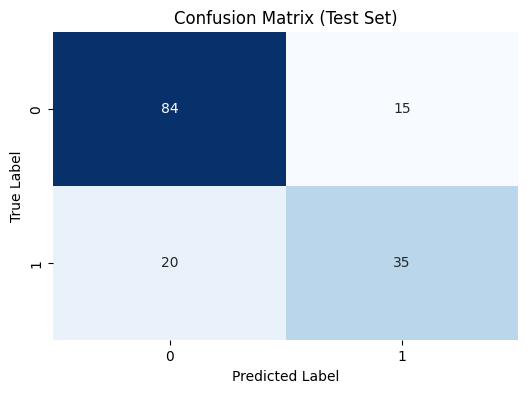

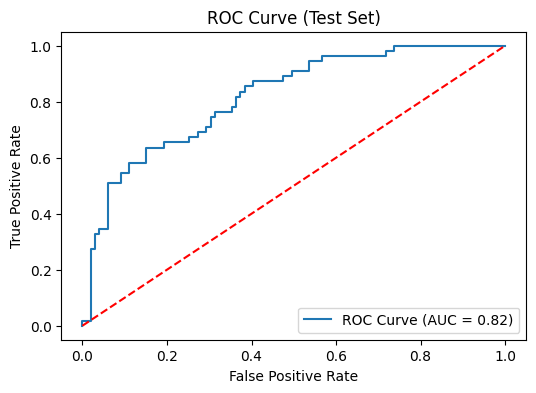

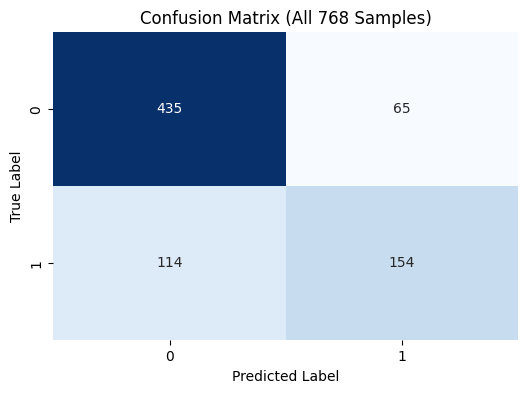

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)

# === Data split ===
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Selection = Filter Method
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(" Best Features :", selected_features.tolist())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

# Hyperparameter Tuning → Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Model performance (test set)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix → শুধু test set এর জন্য (~154 sample)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve → test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend(loc="lower right")
plt.show()


# === Extra Part: Full dataset এর জন্য Confusion Matrix (768 sample) ===
y_pred_all = best_model.predict(X_new)   # পুরো dataset এ prediction
cm_all = confusion_matrix(y, y_pred_all)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (All 768 Samples)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


 Best Features : ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
 Best Parameters: {'C': 10, 'solver': 'liblinear'}

 Accuracy (Full Dataset): 0.76953125

 Classification Report (Full Dataset):
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



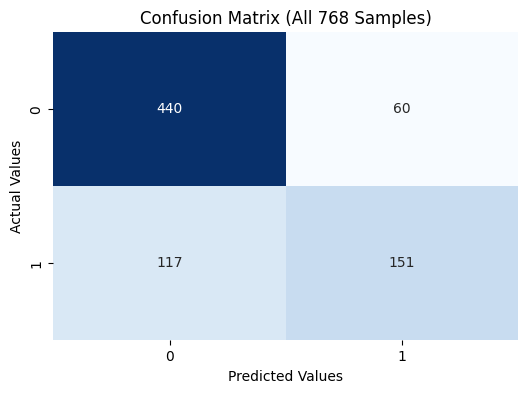

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix
)

# === Data split ===
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Selection = Filter Method
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(" Best Features :", selected_features.tolist())

# Train-test split (for hyperparameter tuning)
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

# Hyperparameter Tuning → Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)

# === Final Model retrain on full dataset ===
final_model = LogisticRegression(
    C=grid.best_params_['C'],
    solver=grid.best_params_['solver'],
    max_iter=1000
)

final_model.fit(X_new, y)

# Predict on full dataset
y_pred_all = final_model.predict(X_new)

# Confusion Matrix (all 768 samples)
cm_all = confusion_matrix(y, y_pred_all)

print("\n Accuracy (Full Dataset):", accuracy_score(y, y_pred_all))
print("\n Classification Report (Full Dataset):\n", classification_report(y, y_pred_all))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (All 768 Samples)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


 Best Features : ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
 Best Parameters: {'C': 10, 'solver': 'liblinear'}

 Accuracy (Full Dataset): 0.76953125

 Classification Report (Full Dataset):
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



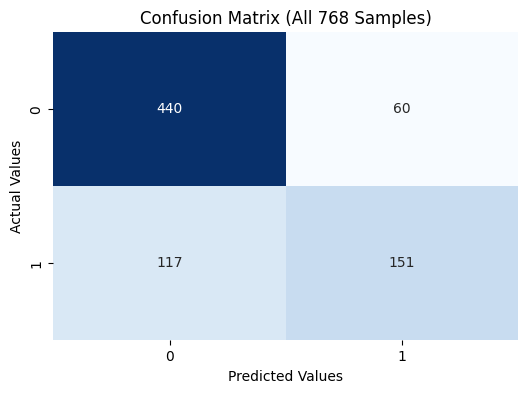

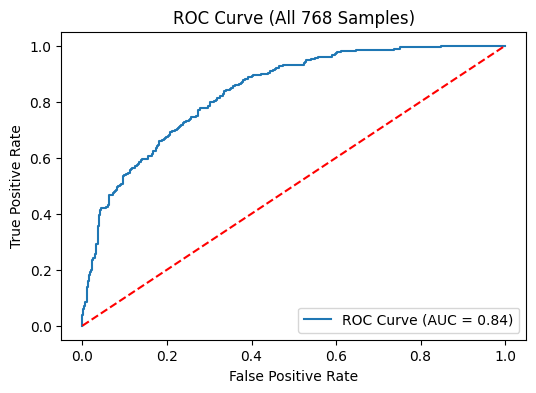

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)

# === Data split ===
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Selection = Filter Method
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(" Best Features :", selected_features.tolist())

# Train-test split (for hyperparameter tuning)
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

# Hyperparameter Tuning → Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print(" Best Parameters:", grid.best_params_)

# === Final Model retrain on full dataset ===
final_model = LogisticRegression(
    C=grid.best_params_['C'],
    solver=grid.best_params_['solver'],
    max_iter=1000
)

final_model.fit(X_new, y)

# Predict on full dataset
y_pred_all = final_model.predict(X_new)

# Confusion Matrix (all 768 samples)
cm_all = confusion_matrix(y, y_pred_all)

print("\n Accuracy (Full Dataset):", accuracy_score(y, y_pred_all))
print("\n Classification Report (Full Dataset):\n", classification_report(y, y_pred_all))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (All 768 Samples)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# === ROC Curve (Full dataset) ===
y_pred_prob_all = final_model.predict_proba(X_new)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_pred_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (All 768 Samples)")
plt.legend(loc="lower right")
plt.show()
